# 1. Carregamento e preparação dos Dados

## Carregamento dos dados

In [17]:
# Carregando o pacote necessário
library(readr)

# Carregando o conjunto de dados
dados <- read_csv("/content/target_store_final_v3.csv")


Rows: 46903 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): month, store_id
dbl (1): sales_target

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Visualização das primeiras linhas

In [18]:
head(dados)

month,store_id,sales_target
<chr>,<chr>,<dbl>
01/2000,RS_37,91812
01/2001,PR_11,86982
01/2001,PR_13,84842
01/2001,PR_33,95664
01/2001,PR_47,90399
01/2001,RJ_23,82911


## Verificação da estrutura dos dados


In [19]:
str(dados)

spc_tbl_ [46,903 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ month       : chr [1:46903] "01/2000" "01/2001" "01/2001" "01/2001" ...
 $ store_id    : chr [1:46903] "RS_37" "PR_11" "PR_13" "PR_33" ...
 $ sales_target: num [1:46903] 91812 86982 84842 95664 90399 ...
 - attr(*, "spec")=
  .. cols(
  ..   month = col_character(),
  ..   store_id = col_character(),
  ..   sales_target = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


# 2. Resumo estatístico e descrição dos dados

## Resumo estatístico

In [20]:
summary(dados)

    month             store_id          sales_target   
 Length:46903       Length:46903       Min.   : 80000  
 Class :character   Class :character   1st Qu.: 94922  
 Mode  :character   Mode  :character   Median :180560  
                                       Mean   :186358  
                                       3rd Qu.:265949  
                                       Max.   :478113  

## Descrição das variáveis

- month: Mês e ano no formato "Mês/Ano"
- store_id: Identificação única da loja
- sales_target: Meta de vendas que a loja precisa atingir no mês/ano especificado

# 3. Análise Univariada

## Visualização das distribuições

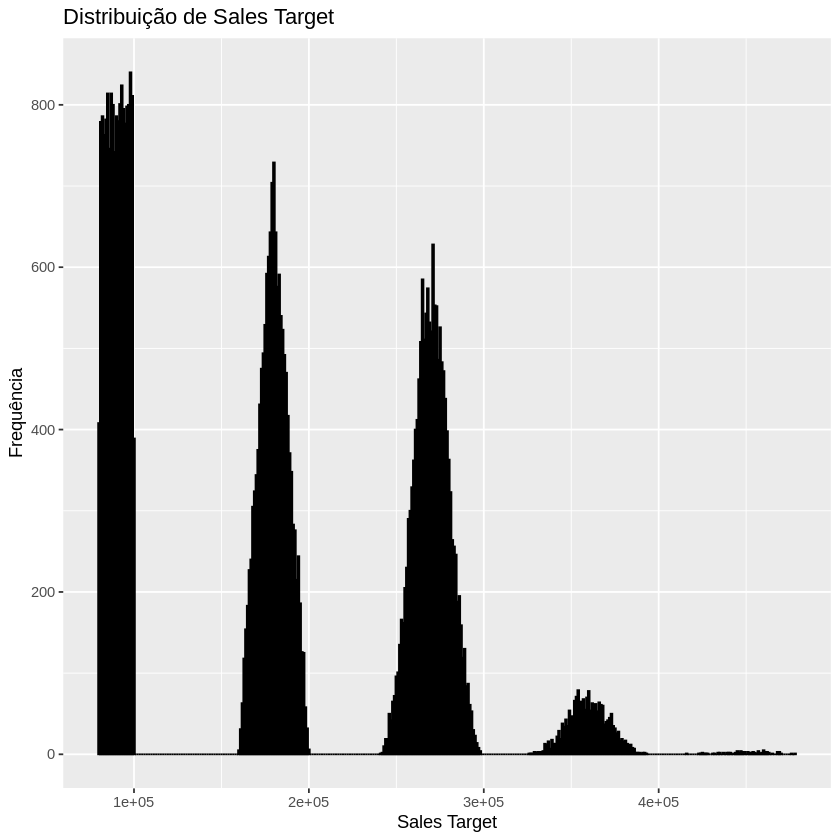

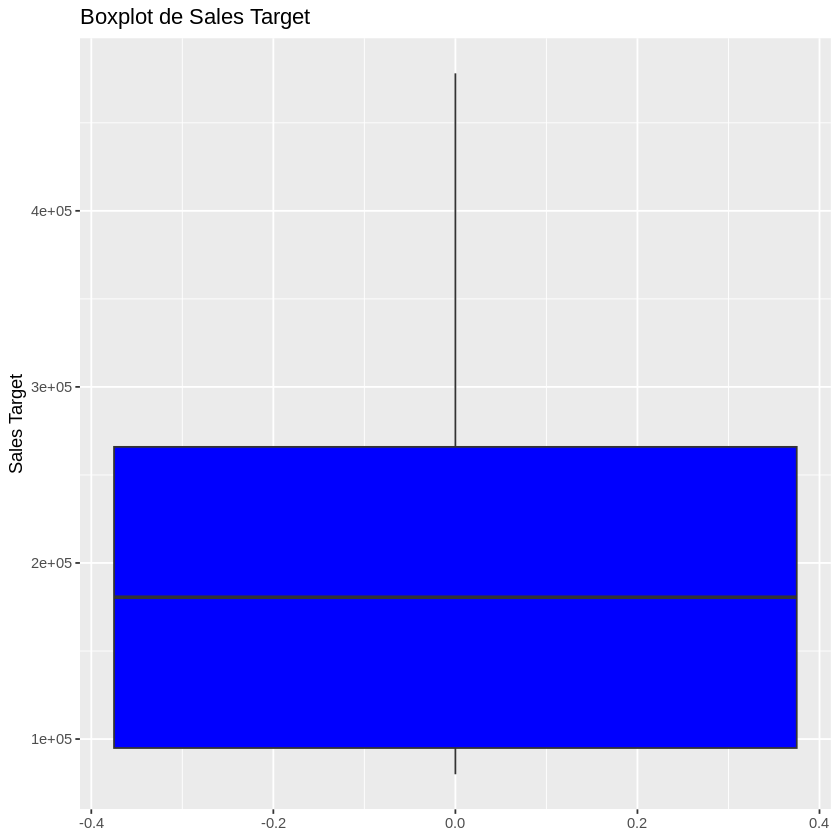

In [21]:
# Carregamento dos pacotes para visualização
library(ggplot2)

# Histogramas das variáveis
ggplot(dados, aes(x=sales_target)) +
  geom_histogram(binwidth=1000, fill="blue", color="black") +
  labs(title="Distribuição de Sales Target", x="Sales Target", y="Frequência")

# Boxplot para identificação de outliers
ggplot(dados, aes(y=sales_target)) +
  geom_boxplot(fill="blue") +
  labs(title="Boxplot de Sales Target", y="Sales Target")


## Identificação de outliers

In [22]:
# Identificação de outliers utilizando o IQR (Interquartile Range)
iqr <- IQR(dados$sales_target)
limite_inferior <- quantile(dados$sales_target, 0.25) - 1.5 * iqr
limite_superior <- quantile(dados$sales_target, 0.75) + 1.5 * iqr

outliers <- dados[dados$sales_target < limite_inferior | dados$sales_target > limite_superior,]
outliers

month,store_id,sales_target
<chr>,<chr>,<dbl>


# 4. Análise Bivariada

## Visualização de relações entre variáveis

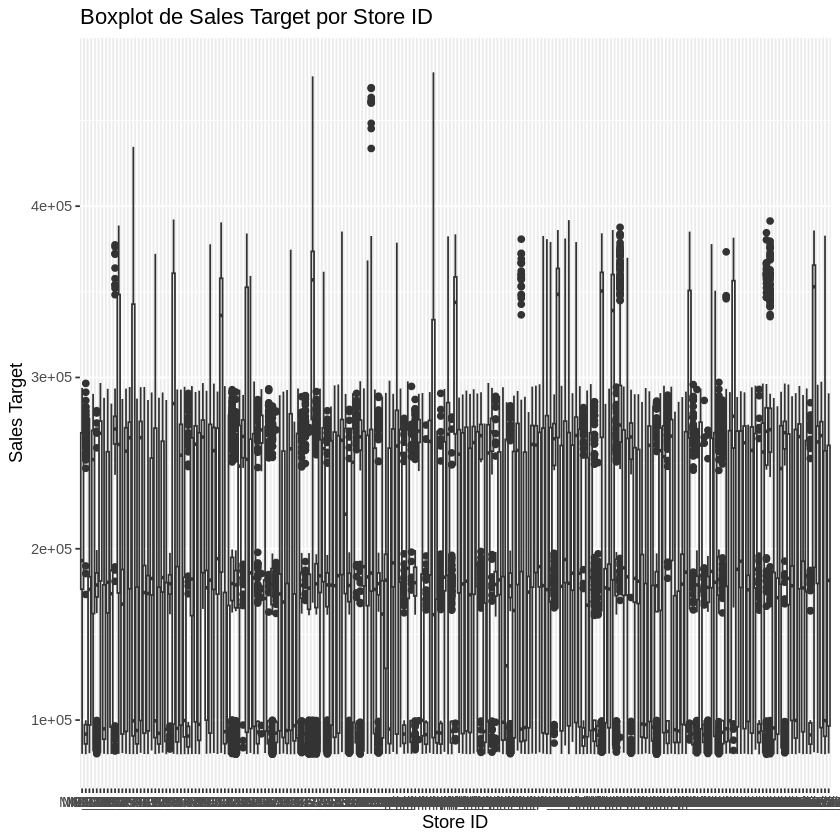

In [23]:
# Visualizando a relação entre sales_target e store_id (exemplo)
ggplot(dados, aes(x=factor(store_id), y=sales_target)) +
  geom_boxplot() +
  labs(title="Boxplot de Sales Target por Store ID", x="Store ID", y="Sales Target")

## Análise de correlação

## Como existe apenas uma variável numérica, não faz sentido calcular uma correlação.

# 5. Análise Multivariada

## Análise de componentes principais e interpretação dos componentes

### Como a análise PCA requer mais variáveis numéricas, também não faz sentido para esse conjunto de dados.

# 6. Conclusão e discussão

## Sumário das descobertas


### - A distribuição de sales_target parece normal com alguns outliers
### - Há variabilidade significativa nos sales_target entre diferentes store_id
### - A análise PCA com uma variável não é aplicável, mas em um caso com mais variáveis, permitiria a identificação das principais fontes de variabilidade nos dados


## Discussão sobre limitações e possíveis melhorias


### - A análise está limitada pelo número de variáveis disponíveis
###   Incluir variáveis adicionais poderia proporcionar insights mais ricos
### - Outliers podem ter um impacto significativo nas análises, e poderiam ser investigados mais a fundo
### Melhorias futuras poderiam incluir a coleta de dados adicionais e a aplicação de técnicas de modelagem preditiva
